In [270]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [184]:
minst = tf.keras.datasets.cifar10

(X_train,y_train),(X_test,y_test) = minst.load_data()

In [185]:
X_train.shape

(50000, 32, 32, 3)

In [186]:
y_train.shape

(50000, 1)

Burada 50000 tane eğitim verimiz oldunu görebiliyoruz

In [187]:
X_test.shape

(10000, 32, 32, 3)

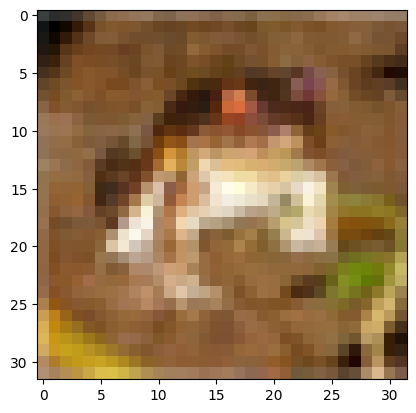

In [188]:
plt.figure()
plt.imshow(X_train[0])
#plt.colorbar()
plt.grid(False)
plt.show()

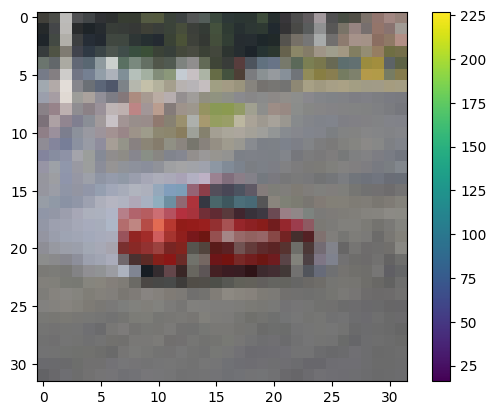

In [189]:
plt.figure()
plt.imshow(X_train[75])
plt.colorbar()
plt.grid(False)
plt.show()

In [190]:
X_train = X_train / 255.0

X_test = X_test / 255.0

Verilerin normalleştirilmesi için bu işlemi gerçekleştiriyoruz

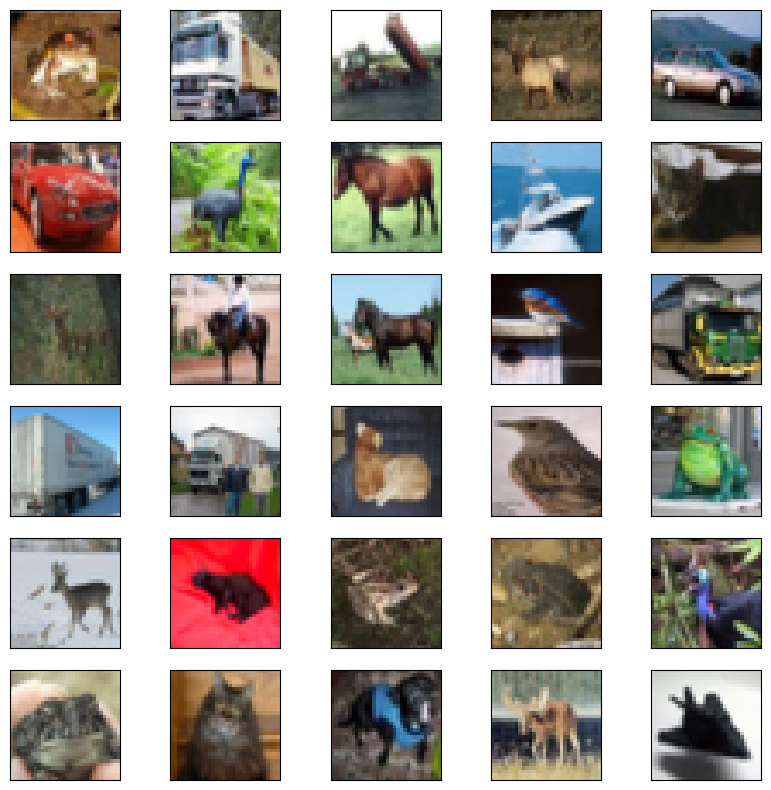

In [191]:
plt.figure(figsize=(10,10))

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

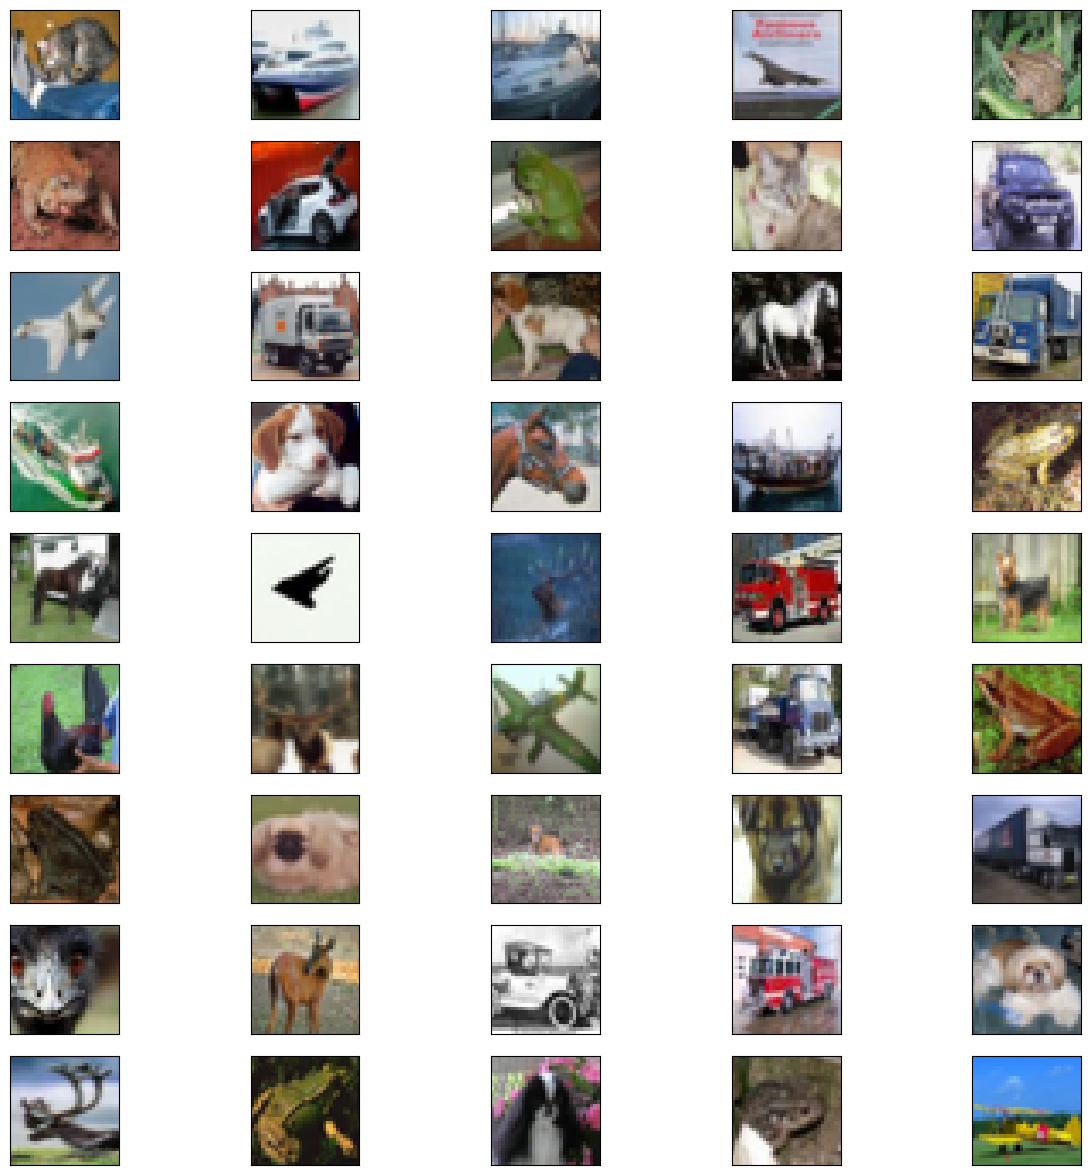

In [192]:
plt.figure(figsize=(15,15))
for i in range(45):
    plt.subplot(9,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
plt.show()

In [193]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [194]:
knn=KNeighborsClassifier().fit(X_train,y_train)

In [195]:
y_pred=knn.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [196]:
acc

0.3398

In [197]:
f1

0.3260170986061005

In [198]:
recall

0.3398

In [199]:
precision

0.4304261825528496

In [200]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[537,   4, 117,  13,  59,   7,  26,   5, 225,   7],
       [139, 205, 110,  42, 155,  36,  61,  10, 217,  25],
       [107,   3, 452,  52, 226,  34,  66,   8,  49,   3],
       [ 70,   8, 234, 217, 193, 115,  95,  17,  46,   5],
       [ 64,   1, 262,  35, 514,  21,  41,   7,  53,   2],
       [ 71,   3, 227, 155, 187, 220,  66,  14,  51,   6],
       [ 27,   2, 273,  68, 314,  37, 248,   2,  28,   1],
       [ 93,  10, 181,  50, 280,  52,  53, 210,  67,   4],
       [141,  14,  52,  38,  54,  16,  14,   8, 655,   8],
       [153,  67,  98,  68, 124,  23,  46,  29, 252, 140]])

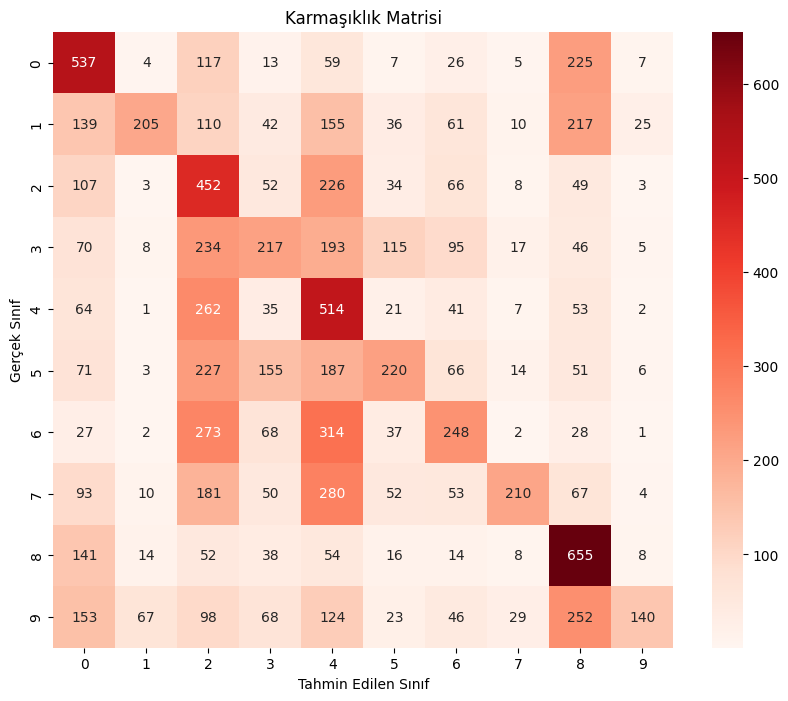

In [201]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Reds", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

Karışık ağaç sınıflandırması

In [202]:
rf=RandomForestClassifier().fit(X_train,y_train)

In [203]:
y_pred=rf.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [204]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.4706
F1 Skoru: 0.4665
Geri Çağırma (Recall): 0.4706
Kesinlik (Precision): 0.4654


In [205]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[576,  34,  54,  19,  32,  20,  17,  27, 166,  55],
       [ 34, 548,  23,  28,  14,  35,  34,  35,  59, 190],
       [105,  38, 331,  81, 135,  73, 121,  63,  28,  25],
       [ 52,  41,  79, 276,  76, 177, 141,  63,  21,  74],
       [ 55,  21, 135,  54, 397,  52, 149,  92,  25,  20],
       [ 38,  32,  90, 146,  69, 406,  83,  81,  23,  32],
       [ 13,  33,  82,  63, 106,  55, 564,  36,  11,  37],
       [ 48,  43,  51,  56,  98,  84,  46, 459,  23,  92],
       [ 90,  91,  17,  27,  19,  30,  12,  25, 613,  76],
       [ 50, 177,  19,  30,  20,  18,  26,  46,  78, 536]])

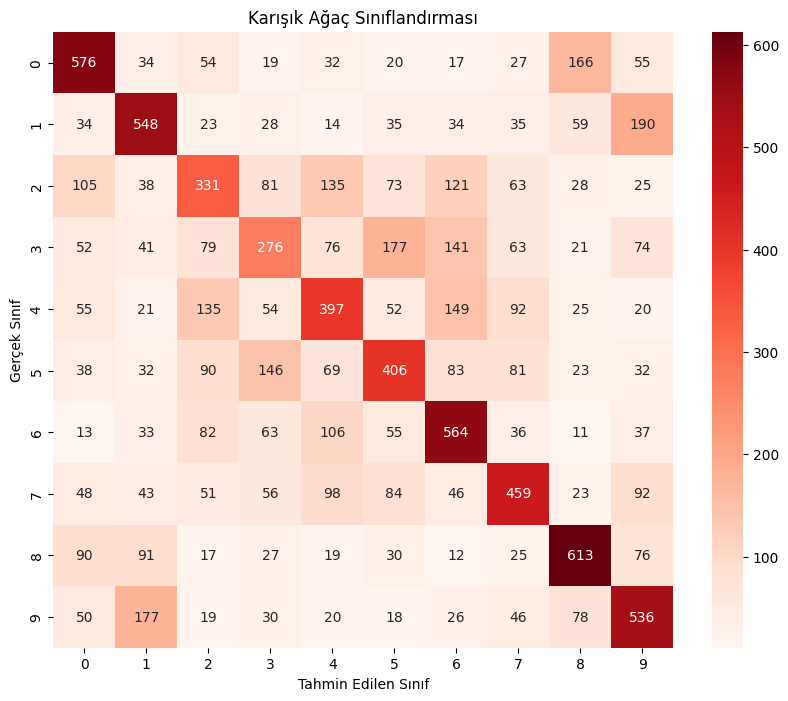

In [206]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Reds", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karışık Ağaç Sınıflandırması')
plt.show()

Karar ağacı

In [207]:
dt=DecisionTreeClassifier().fit(X_train,y_train)

In [208]:
y_pred=dt.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [209]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')


Doğruluk (Accuracy): 0.2703
F1 Skoru: 0.2701
Geri Çağırma (Recall): 0.2703
Kesinlik (Precision): 0.2701


In [210]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[343,  86,  80,  49,  61,  48,  41,  58, 163,  71],
       [ 70, 276,  73,  79,  65,  48,  43,  69, 113, 164],
       [ 97,  45, 228,  89, 143, 111, 116,  83,  36,  52],
       [ 62,  65, 119, 193, 110, 132, 130,  83,  50,  56],
       [ 53,  59, 156,  81, 236, 103, 129, 101,  37,  45],
       [ 49,  62, 123, 152,  93, 207,  95,  97,  59,  63],
       [ 43,  52, 121, 126, 133, 106, 273,  69,  30,  47],
       [ 75,  80,  83,  87, 106, 104,  51, 271,  66,  77],
       [145,  96,  44,  43,  52,  50,  32,  41, 386, 111],
       [ 86, 174,  57,  58,  43,  54,  54,  87,  97, 290]])

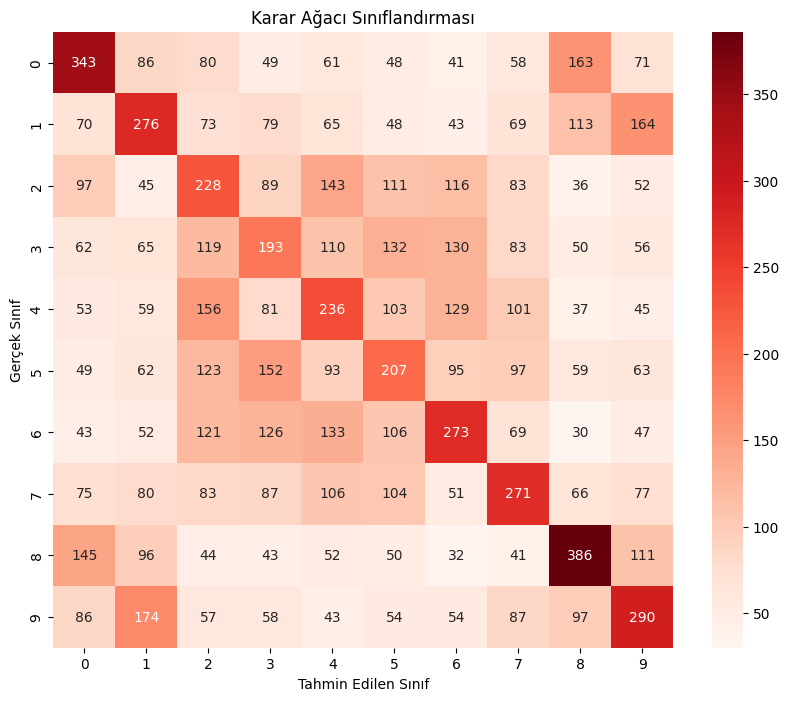

In [211]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Reds", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karar Ağacı Sınıflandırması')
plt.show()

In [212]:
df=load_digits()

digit verisini çekilmesi

In [213]:
sample = len(df.images)
data = df.images.reshape((sample, -1))

In [214]:
X=data
y=df.target

Bağımlı ve bağımsız değişkenleri ayırıyoruz

In [215]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.33, random_state=42)

In [216]:
model = SVC(kernel="rbf",C=1E6)
model.fit(X_train,y_train, sample_weight=None)

SVC(C=1000000.0)

SVC modelinin kullanılması

In [217]:
y_pred = model.predict(X_test)

In [218]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 54,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 64,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 72,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 66]])

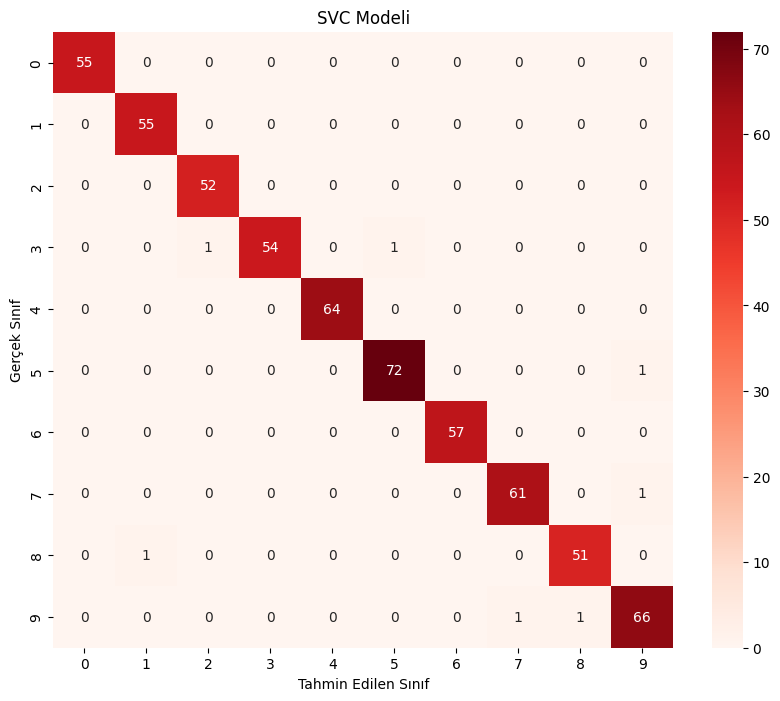

In [219]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Reds", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('SVC Modeli')
plt.show()

In [220]:
y_pred = model.predict(X_train)

In [221]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[123,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 127,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 125,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 127,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 117,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 109,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 124,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 117,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 122,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 112]])

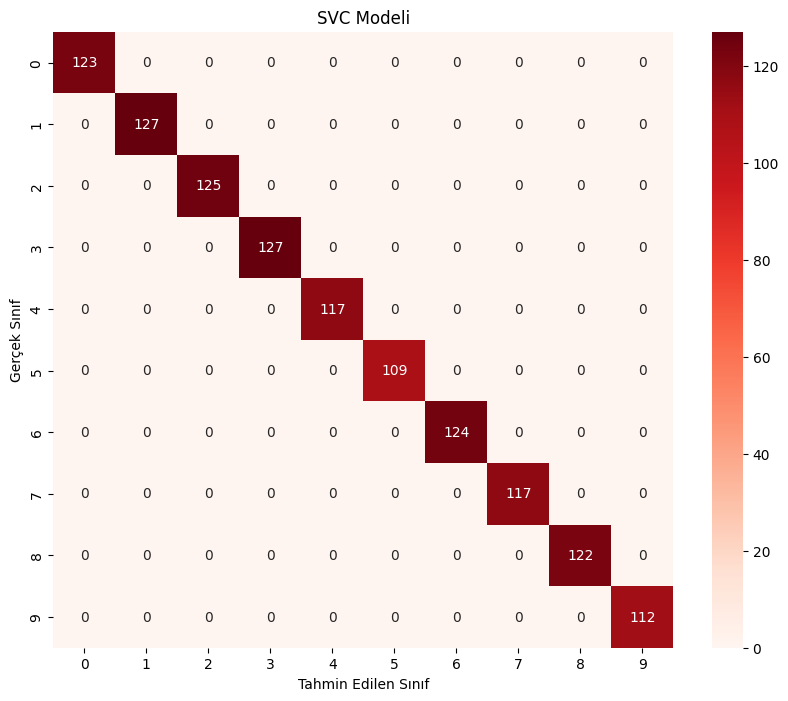

In [222]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Reds", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('SVC Modeli')
plt.show()

In [223]:
mnist=tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [224]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [225]:
X_train.shape[0]

60000

In [226]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [227]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),


    tf.keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 10)                90        
                                                                 
Total params: 3270 (12.77 KB)
Trainable params: 3270 (12.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [228]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [229]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9863 - accuracy: 0.6593 - val_loss: 0.6287 - val_accuracy: 0.8020
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5851 - accuracy: 0.8206 - val_loss: 0.5526 - val_accuracy: 0.8362
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5103 - accuracy: 0.8480 - val_loss: 0.4784 - val_accuracy: 0.8591
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4731 - accuracy: 0.8611 - val_loss: 0.4599 - val_accuracy: 0.8656
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4534 - accuracy: 0.8691 - val_loss: 0.4568 - val_accuracy: 0.8679
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4423 - accuracy: 0.8717 - val_loss: 0.4457 - val_accuracy: 0.8706
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4346 - accuracy: 0.8740 - val_loss: 0.4484 - val_accuracy:

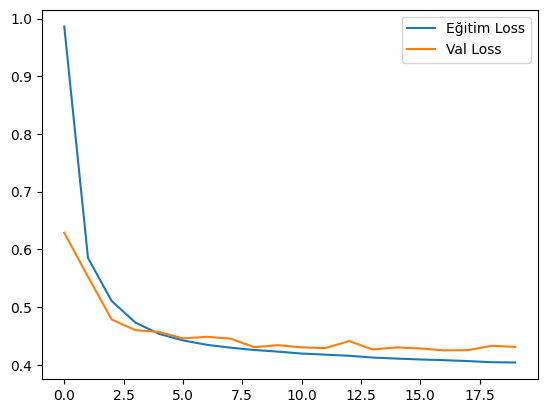

In [230]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

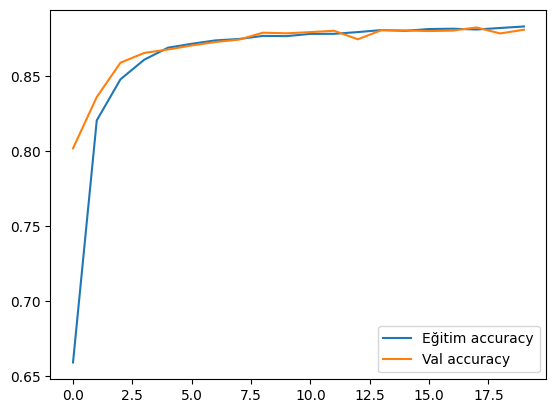

In [231]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

In [263]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.F1Score()])

In [264]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3709 - accuracy: 0.8903 - precision_5: 0.9101 - recall_5: 0.8750 - f1_score: 0.8885 - val_loss: 0.4130 - val_accuracy: 0.8843 - val_precision_5: 0.9007 - val_recall_5: 0.8681 - val_f1_score: 0.8819
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3706 - accuracy: 0.8904 - precision_5: 0.9102 - recall_5: 0.8747 - f1_score: 0.8886 - val_loss: 0.4051 - val_accuracy: 0.8855 - val_precision_5: 0.9018 - val_recall_5: 0.8698 - val_f1_score: 0.8834
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3706 - accuracy: 0.8896 - precision_5: 0.9096 - recall_5: 0.8746 - f1_score: 0.8879 - val_loss: 0.4242 - val_accuracy: 0.8795 - val_precision_5: 0.8968 - val_recall_5: 0.8644 - val_f1_score: 0.8770
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3708 - accuracy: 0.8907 - precision_5: 0.9109 - recall_5: 0.8743 - f1_score: 0.8889 - val_loss

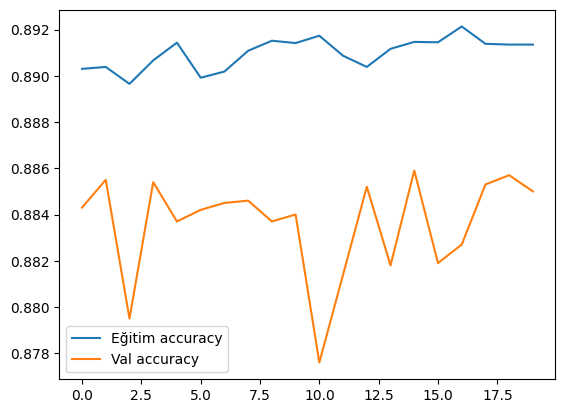

In [265]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

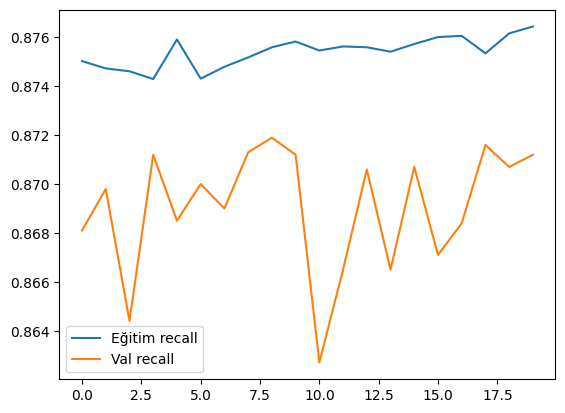

In [274]:
plt.plot(hist.history['recall_5'], label="Eğitim recall")
plt.plot(hist.history["val_recall_5"], label="Val recall")
plt.legend()
plt.show()

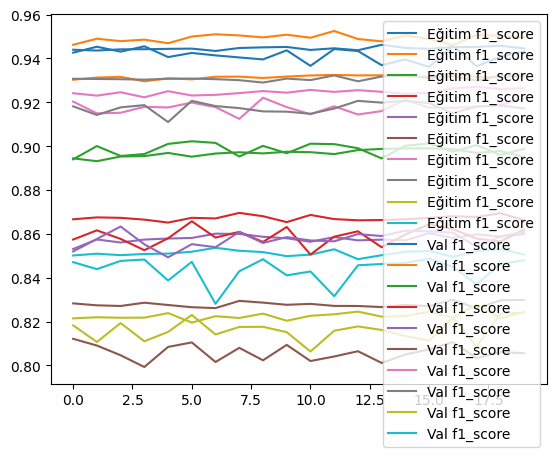

In [246]:
plt.plot(hist.history["f1_score"], label="Eğitim f1_score")
plt.plot(hist.history["val_f1_score"], label="Val f1_score")
plt.legend()
plt.show()

In [275]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, \
                                    Concatenate, GlobalMaxPooling2D, \
                                    MaxPooling2D, GlobalAveragePooling2D, \
                                    AveragePooling2D,Dropout

In [276]:
model=tf.keras.Sequential([
        tf.keras.layers.InputLayer((28,28,1)),
        tf.keras.layers.Rescaling(1/255.0),

        Conv2D(8,3,activation="relu"),
        MaxPooling2D((2,2)),
        Conv2D(16,3,activation="relu"),
        MaxPooling2D((2,2)),
        Flatten(),

        Dense(10,activation="softmax")
    ])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 400)              

In [277]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [278]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.9092 - accuracy: 0.7395 - val_loss: 0.4295 - val_accuracy: 0.8719
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4055 - accuracy: 0.8790 - val_loss: 0.3501 - val_accuracy: 0.8940
Epoch 3/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3467 - accuracy: 0.8971 - val_loss: 0.3067 - val_accuracy: 0.9058
Epoch 4/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3058 - accuracy: 0.9089 - val_loss: 0.2666 - val_accuracy: 0.9194
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2701 - accuracy: 0.9190 - val_loss: 0.2327 - val_accuracy: 0.9284
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2393 - accuracy: 0.9283 - val_loss: 0.2056 - val_accuracy: 0.9396
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2119 - accuracy: 0.9365 - val_loss: 0.1793 -

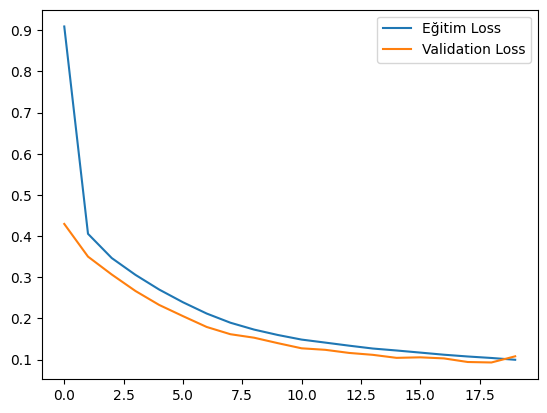

In [279]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

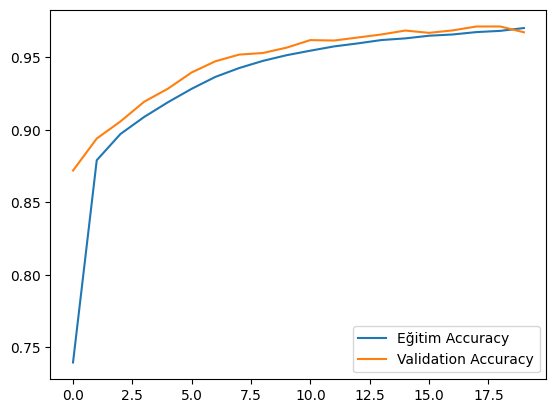

In [280]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()